In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd ~/PycharmProjects/pqr/

from pqr.preprocessing import correct_matrices, replace_with_nan

from pqr.factors import PickingFactor, FilteringFactor
from pqr.factor_model import FactorModel

/home/akbabkin/PycharmProjects/pqr


In [3]:
prices = pd.read_excel('~/notebooks/pqr/factors/monthlyprice.xlsx', parse_dates=True, index_col=0).astype(float)
pe = pd.read_excel('~/notebooks/pqr/factors/PE.xlsx', parse_dates=True, index_col=0).astype(float)
volume = pd.read_excel('~/notebooks/pqr/factors/betafilter.xlsx', parse_dates=True, index_col=0).astype(float)

In [4]:
prices, pe, volume = correct_matrices(prices, pe, volume)
prices, pe, volume = replace_with_nan(prices, pe, volume, to_replace=[0])

In [5]:
value = PickingFactor(
    data=pe,
    dynamic=False,
    bigger_better=False,
    name='value'
)

liquidity = FilteringFactor(
    data=volume,
    dynamic=False,
    min_threshold=10_000_000,
    name='liquidity'
)

In [6]:
fm = FactorModel(
    looking_period=3,
    lag_period=0,
    holding_period=3
)

In [7]:
fm.fit(
    prices=prices,
    picking_factor=value,
    filtering_factor=liquidity,
    n_quantiles=3,
    add_wml=True
)

,"Portfolio(Quantiles(0.00, 0.33))","Portfolio(Quantiles(0.33, 0.67))","Portfolio(Quantiles(0.67, 1.00))",WMLPortfolio()
"Alpha, %",0.83,-0.08,0.40,0.43
Alpha p-value,0.05,0.86,0.39,0.18
Beta,0.86,0.86,0.77,0.09
Beta p-value,0.00,0.00,0.00,0.09
Sharpe Ratio,0.76,0.34,0.51,0.40
"Mean Return, %",1.68,0.78,1.16,0.51
"Excessive Return, %",0.65,-0.24,0.14,-0.51
"Total Return, %",1651.91,141.56,477.30,134.88
"Volatility, %",7.64,8.00,7.88,4.46
Benchmark Correlation,0.64,0.61,0.55,0.12


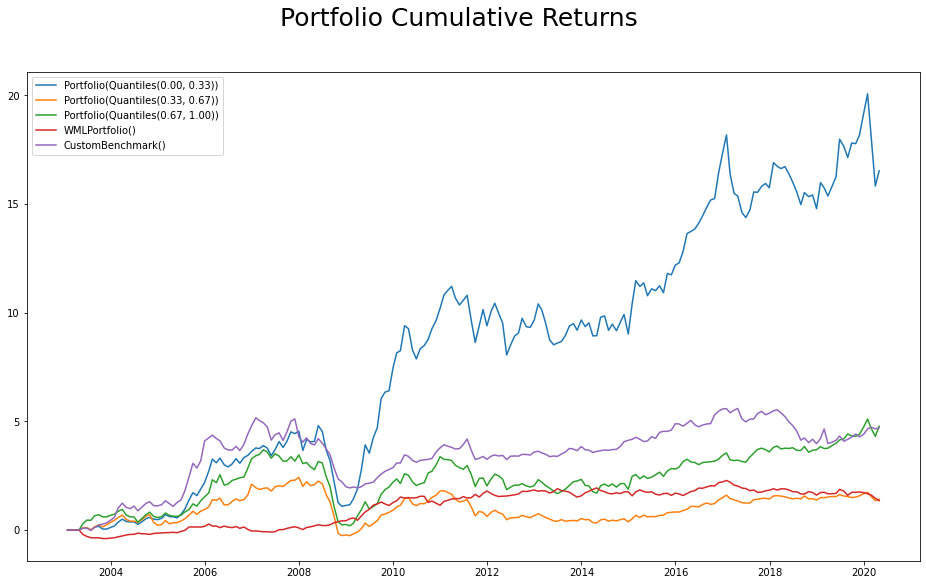

In [8]:
fm.compare_portfolios(plot=True)